In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from nltk.corpus import stopwords ##Sirve para manejar palabras vacias de un texto


%matplotlib inline

In [202]:
df=pd.read_csv('train.csv', low_memory=False)
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Limpiando caracteres especiales

In [203]:
df['text'] = df['text'].str.replace("[^a-z A-Z 0-9 # @]", " ") #selecciono solo esos caracteres
df['text'] = df['text'].str.lower() #Convierto Mayuscula en minuscula
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are ...,1
3,6,NaN,NaN,13 000 people receive #wildfires evacuation or...,1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


### Obteniendo palabras mayor a 3 caracteres

In [204]:
df['text'] = df['text'].apply(lambda x: ( [ word for word in x.split() if len(word)>3 ]) )
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, this, #earthquake, allah, forg...",1
1,4,NaN,NaN,"[forest, fire, near, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, being, noti...",1
3,6,NaN,NaN,"[people, receive, #wildfires, evacuation, orde...",1
4,7,NaN,NaN,"[just, sent, this, photo, from, ruby, #alaska,...",1


### Analizamos las palabras que se encuentra en text

In [206]:
def contarFrecuenciaDePalabras(unaLista,lista):
   
        for palabra in unaLista:
            try:    
                if palabra not in lista:
                    lista[palabra] = 0
                lista[palabra] += 1  
            except UnicodeEncodeError:
                continue
                      

In [207]:
# Se recuerda que los elementos que tiene la columna text esta como una lista de palabras
lista={} #es la lista que generaremos de todas las palabras que exista en la columna text
a=df['text'].apply(lambda unaLista: contarFrecuenciaDePalabras(unaLista,lista))

In [208]:
palabraYFrecuencia=sorted(lista.items(), key= lambda x: x[1], reverse = True)
palabraYFrecuencia

[('http', 4309),
 ('that', 625),
 ('with', 574),
 ('this', 480),
 ('from', 422),
 ('https', 412),
 ('have', 386),
 ('like', 348),
 ('just', 323),
 ('your', 293),
 ('after', 259),
 ('will', 258),
 ('when', 255),
 ('fire', 250),
 ('they', 231),
 ('what', 223),
 ('more', 218),
 ('about', 214),
 ('people', 198),
 ('been', 191),
 ('over', 190),
 ('there', 189),
 ('into', 174),
 ('video', 162),
 ('emergency', 153),
 ('disaster', 150),
 ('police', 142),
 ('than', 139),
 ('would', 137),
 ('body', 130),
 ('some', 129),
 ('still', 129),
 ('were', 126),
 ('news', 121),
 ('burning', 121),
 ('back', 119),
 ('storm', 119),
 ('suicide', 119),
 ('crash', 117),
 ('california', 116),
 ('time', 116),
 ('them', 115),
 ('know', 113),
 ('buildings', 111),
 ('first', 109),
 ('going', 104),
 ('bomb', 104),
 ('fires', 101),
 ('attack', 101),
 ('today', 100),
 ('here', 99),
 ('love', 98),
 ('year', 98),
 ('killed', 98),
 ('dead', 97),
 ('world', 95),
 ('nuclear', 95),
 ('their', 94),
 ('full', 94),
 ('train', 9

### Sacamos palabras que no son relevantes
Para esta parte de analisis estaria bueno implementar stopwords, lo veremos mejor para la segunda parte del tp, por el
momento se saca las palabras vacias en forma manual, por ahi falta pulir mas estos datos y ver cuales son mas relevantes

In [181]:
#consideramos palabras vacias en ingles los articulos, pronombres, preposiciones,posesivos, entre otros
listaIrrelevante = ['i','you', 'he','she', 'it','we','they','my','your','his','her','their','our', 
                    'this', 'that', 'these', 'those','who', 'what', 'where', 'when', 'why', 'how' , 'while', 
                    'the','a','an','in','on','at','are','is','be','about','for','from','of','or','to',
                    'was','will','http','with','https','just','more','after','there','into','than', 'only','many',
                   'some','them','know','here','last','then','even','another','latest','every','most','before','because'
                   'always','does','never','everyone','near','ever','next','without','well','cause','mine','mean','between',
                   'means','wasn','else','others','other','haha','self','thank','very','same','about','didn','doesn',
                   'yours','being','aren']


In [209]:
def quitarPalabrasVacias(unaLista, listaIrrelevante):
    return [w for w in unaLista if w not in listaIrrelevante]


In [210]:
df['text']= df['text'].apply(lambda unaLista: quitarPalabrasVacias(unaLista, listaIrrelevante) )
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, #earthquake, allah, forgive]",1
1,4,NaN,NaN,"[forest, fire, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, #wildfires, evacuation, orde...",1
4,7,NaN,NaN,"[sent, photo, ruby, #alaska, smoke, #wildfires...",1


ESTOS 2 RENGLONES SOLO ME SIRVE PARA VER QUE PALABRAS VACIAS SE LIMPIARON Y AUN FALTA SEGUIR ANALIZANDO CUALES SON 
CONSIDERADAS VACIAS

In [211]:
lista={} #es la lista que generaremos de todas las palabras que exista en la columna text
a=df['text'].apply(lambda unaLista: contarFrecuenciaDePalabras(unaLista,lista))

In [212]:
palabraYFrecuencia=sorted(lista.items(), key= lambda x: x[1], reverse = True)
palabraYFrecuencia

[('have', 386),
 ('like', 348),
 ('fire', 250),
 ('people', 198),
 ('been', 191),
 ('over', 190),
 ('video', 162),
 ('emergency', 153),
 ('disaster', 150),
 ('police', 142),
 ('would', 137),
 ('body', 130),
 ('still', 129),
 ('were', 126),
 ('news', 121),
 ('burning', 121),
 ('back', 119),
 ('storm', 119),
 ('suicide', 119),
 ('crash', 117),
 ('california', 116),
 ('time', 116),
 ('buildings', 111),
 ('first', 109),
 ('going', 104),
 ('bomb', 104),
 ('fires', 101),
 ('attack', 101),
 ('today', 100),
 ('love', 98),
 ('year', 98),
 ('killed', 98),
 ('dead', 97),
 ('world', 95),
 ('nuclear', 95),
 ('full', 94),
 ('train', 93),
 ('life', 89),
 ('good', 89),
 ('down', 88),
 ('families', 87),
 ('think', 86),
 ('accident', 85),
 ('watch', 84),
 ('could', 83),
 ('@youtube', 83),
 ('home', 82),
 ('2015', 81),
 ('make', 80),
 ('want', 80),
 ('years', 79),
 ('collapse', 75),
 ('work', 74),
 ('because', 74),
 ('#news', 74),
 ('death', 74),
 ('mass', 74),
 ('look', 73),
 ('help', 73),
 ('please', 7

### Visualizacion 1: palabras con mayor frecuencia en el campo text

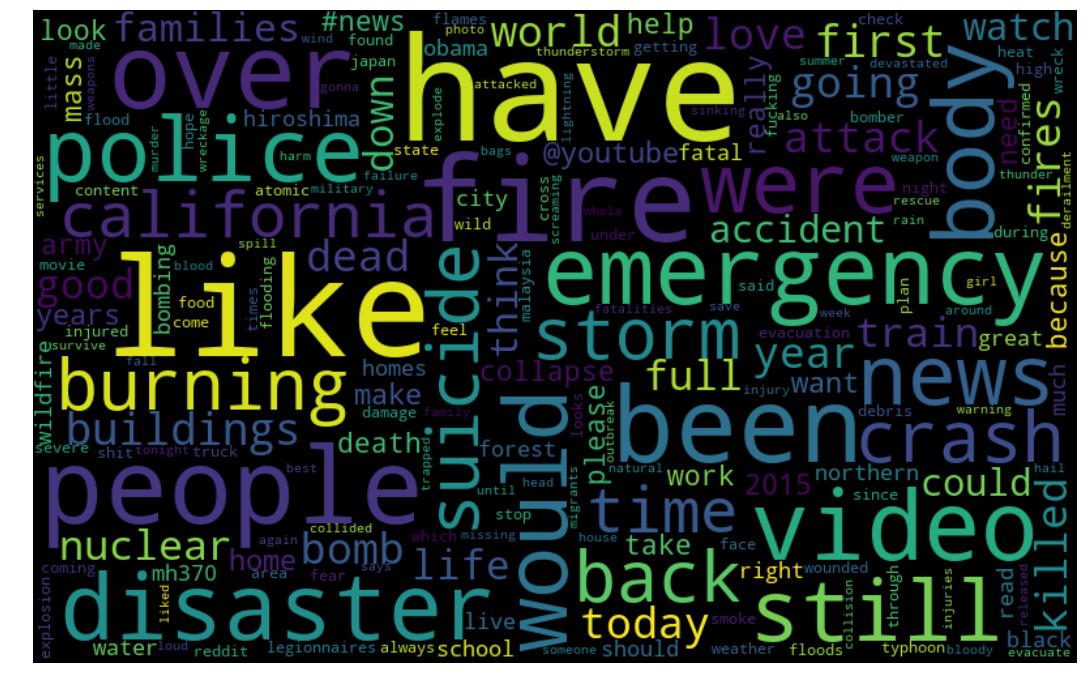

In [217]:
from wordcloud import WordCloud
wordcloud.generate_from_frequencies(frequencies=lista)

plt.figure(figsize=(20, 12))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Tendencias

El nro de tweets = nro palabras relevantes que se repite en distintos tweet 

1) Se considerara tendencia el nro tweets relacionado con la location

2) Se considera tendencia el nro tweets relacionado con keyword

3) Se considera tendencia el nro de tweets relacionado con keyword y location

4) Si hay tendencias y # que se relacionan con un mismo keyword, se considerara lo mismo #CovidArgentina = #ArgentinaCovid

5) Tendencia por cuenta; se considera por keyword y @